In [1]:
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join
data = "../data/NYS_Civil_Boundaries.shp/Counties.shp"
directory = "../data/NYS_Civil_Boundaries.shp/"
counties = gpd.read_file(data)
counties = counties.to_crs(epsg=4326)

In [4]:
ny

{'NAME': 'New York',
 'ABBREV': 'NEWY',
 'GNIS_ID': '974129',
 'FIPS_CODE': '36061',
 'SWIS': '620000',
 'NYSP_ZONE': 'Long Island',
 'POP1990': 1487536,
 'POP2000': 1537195,
 'POP2010': 1585873,
 'POP2020': 1694251,
 'DOS_LL': '',
 'DOSLL_DATE': None,
 'NYC': 'Y',
 'CALC_SQ_MI': 33.7256341566,
 'DATEMOD': datetime.date(2019, 10, 4),
 'Shape_Leng': 60023.6142347,
 'Shape_Area': 87348991.4677}

In [5]:
counties

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,None,None,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"POLYGON ((-73.70733 42.78605, -73.70397 42.783..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09,"POLYGON ((-78.29218 42.52139, -78.29047 42.521..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,None,None,Y,57.472148,2019-10-04,57253.861278,1.488522e+08,"POLYGON ((-73.86567 40.90219, -73.86300 40.901..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,None,None,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"POLYGON ((-75.86416 42.41554, -75.86379 42.413..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,None,None,N,1324.309219,2019-04-26,276084.505560,3.429945e+09,"POLYGON ((-79.02148 42.53803, -79.01937 42.537..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,WASH,974155,36115,530000,East,59330,61042,63216,61302,None,None,N,845.855708,2017-11-10,302358.996697,2.190756e+09,"POLYGON ((-73.37718 43.79995, -73.37690 43.799..."
58,Wayne,WAYN,974156,36117,540000,Central,89123,93765,93772,91283,None,None,N,1395.598959,2018-02-08,254972.219986,3.614585e+09,"POLYGON ((-76.74696 43.69594, -76.72214 43.343..."
59,Westchester,WEST,974157,36119,550000,East,874866,923459,949113,1004457,None,None,N,499.972897,2019-10-04,182997.677827,1.294924e+09,"POLYGON ((-73.54795 41.31920, -73.54819 41.316..."
60,Wyoming,WYOM,974158,36121,560000,West,42507,43424,42155,40531,None,None,N,596.822633,2018-09-20,176096.925232,1.545764e+09,"POLYGON ((-78.36506 42.86885, -78.36497 42.868..."


In [6]:
ny = counties[counties.loc[:, "NAME"]=="New York"].loc[:, "geometry"]
type(ny)

geopandas.geoseries.GeoSeries

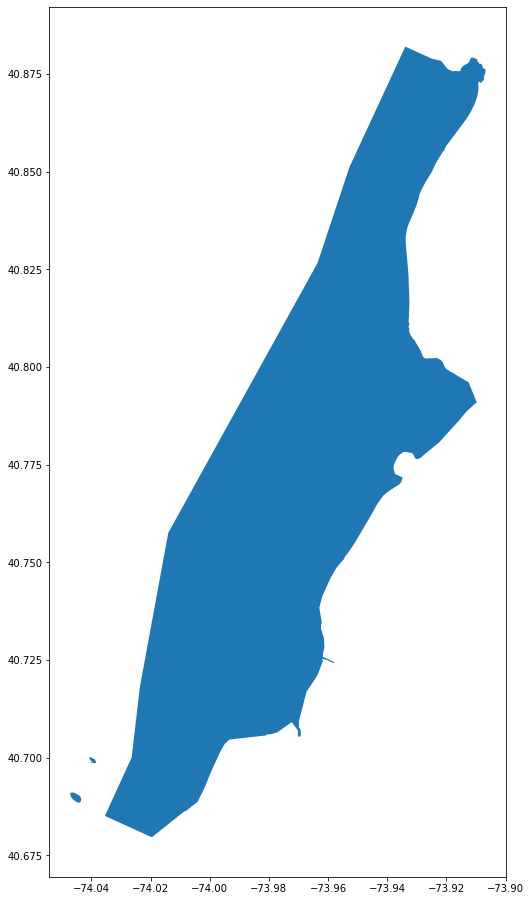

In [7]:
ny.plot(figsize=(24,16));

In [8]:
ny.contains(Point(40.750,-74))

30    False
dtype: bool

In [9]:
img_dir = "../data/images/"
data_dir = "../data/"
from scipy.io import loadmat
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures


In [10]:
type(coordinates[0][0])

numpy.float64

In [11]:
coordinates = [Point(c[1], c[0]) for c in coordinates]

In [12]:
coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

In [13]:
coordinates_gpd

,geometry
0,POINT (-80.00000 40.44031)
1,POINT (-80.00680 40.44027)
2,POINT (-80.00670 40.44023)
3,POINT (-80.00660 40.44019)
4,POINT (-80.00650 40.44015)
...,...
10338,POINT (-74.00172 40.73055)
10339,POINT (-74.00160 40.73075)
10340,POINT (-74.00154 40.73085)
10341,POINT (-74.00149 40.73093)


In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import reverse_geocoder
from os import listdir
from os.path import isfile, join

In [15]:
### Returns an array of True/False if the coordinate is in a given state
### coordinates: An array of coordinates
### state: Full name of the state. ex= "New York"
def get_coordinates_in_state(coordinates, state):
    coords = [(lat,long) for lat,long,ele in coordinates]
    results = reverse_geocoder.search(coords, mode=2)
    state = [x['admin1']==state for x in results]
    return state

In [16]:
img_dir = "../data/images/"
data_dir = "../data/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))] # Names of all images in the folder
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures
in_ny = get_coordinates_in_state(coordinates=coordinates, state="New York") # All coordinates in NY
in_ny[:5]

Loading formatted geocoded file...


[False, False, False, False, False]

In [17]:
ny_coords = [coordinates[x] for x in range(len(in_ny)) if in_ny[x]]
coordinates = [Point(c[1], c[0]) for c in ny_coords]

In [18]:
len(ny_coords)

4731

In [19]:
ny_coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

<AxesSubplot:>

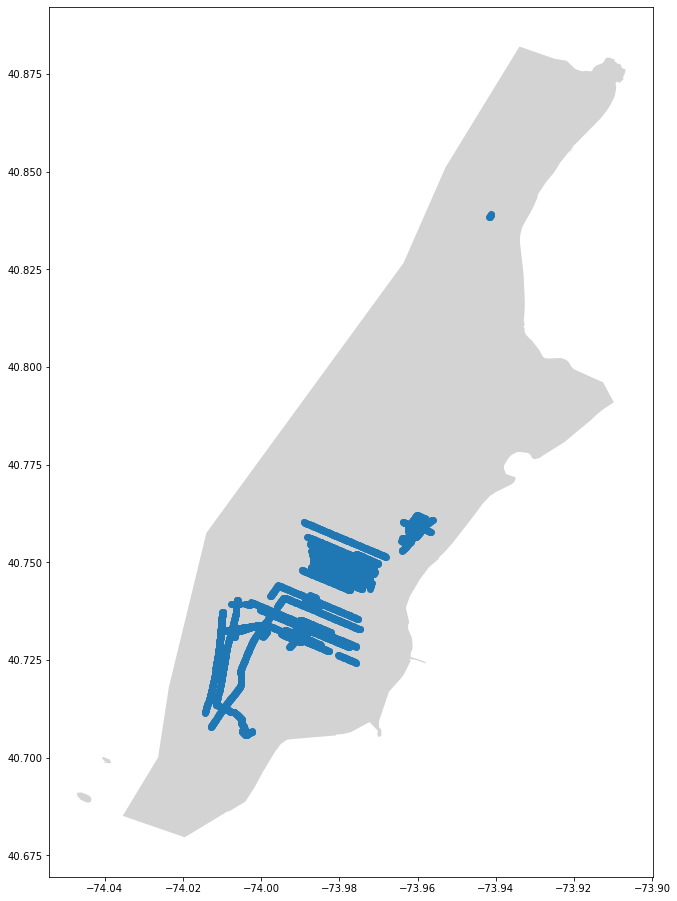

In [20]:
import matplotlib.pyplot as plt
ax = ny.plot(color='lightgrey',figsize=(16,16))
ny_coordinates_gpd.loc[:,'geometry'].plot(ax=ax)

In [21]:
bounds = ny.bounds
print(bounds)
list(bounds.values)

         minx       miny       maxx       maxy
30 -74.047207  40.679654 -73.906769  40.882012


[array([-74.04720705,  40.6796537 , -73.90676916,  40.8820121 ])]

In [22]:
import pickle

pickle.dump(ny, open("ny.pkl","wb"))

In [23]:
import shapely
import gmaps
from shapely.geometry import Point, Polygon, box
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [24]:
ny_coordinates_gpd

,geometry
0,POINT (-73.97108 40.74847)
1,POINT (-73.97120 40.74852)
2,POINT (-73.97131 40.74857)
3,POINT (-73.97141 40.74861)
4,POINT (-73.97152 40.74866)
...,...
4726,POINT (-74.00172 40.73055)
4727,POINT (-74.00160 40.73075)
4728,POINT (-74.00154 40.73085)
4729,POINT (-74.00149 40.73093)


In [25]:
# total area for the grid
xmin, ymin, xmax, ymax= ny.total_bounds

# how many cells across and down
n_cells=50
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

<AxesSubplot:>

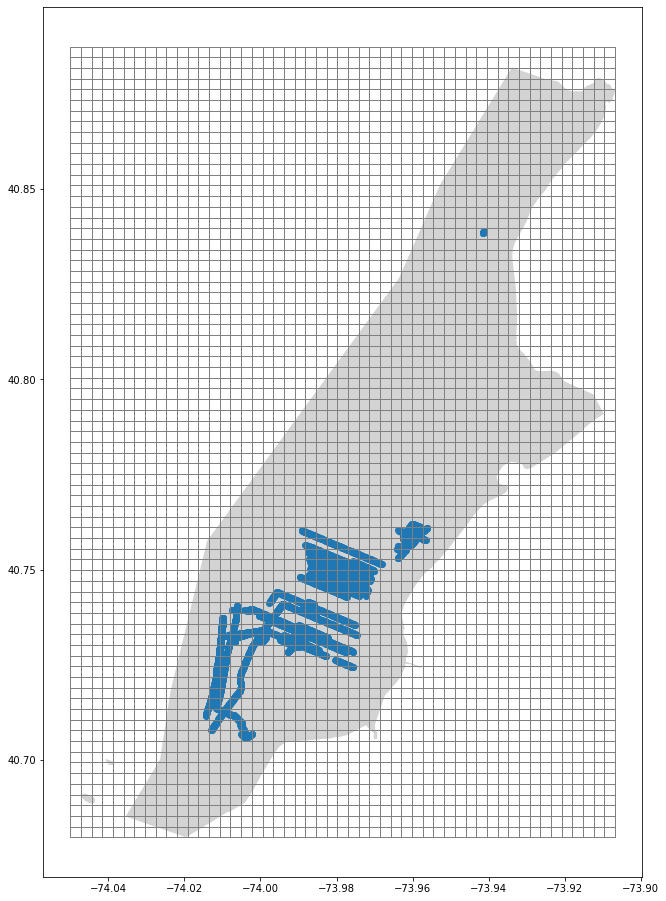

In [26]:
import matplotlib.pyplot as plt
ax = ny.plot(color='lightgrey',figsize=(16,16))
ny_coordinates_gpd.loc[:,'geometry'].plot(ax=ax)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')

In [27]:
ny_coordinates_DF = gpd.GeoDataFrame(geometry=ny_coordinates_gpd.loc[:,'geometry'])

In [28]:
merged = gpd.sjoin(ny_coordinates_DF, cell, how='left', op='within')

C:\Users\mjs47\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\mjs47\AppData\Local\Temp\ipykernel_4088\3736913191.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 + ...

  merged = gpd.sjoin(ny_coordinates_DF, cell, how='left', op='within')


In [29]:
# make a simple count variable that we can sum
merged['n_fires']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'n_fires'] = dissolve.n_fires.values

(-74.05422894785004,
 -73.89974726205489,
 40.669535781164754,
 40.892130019361865)

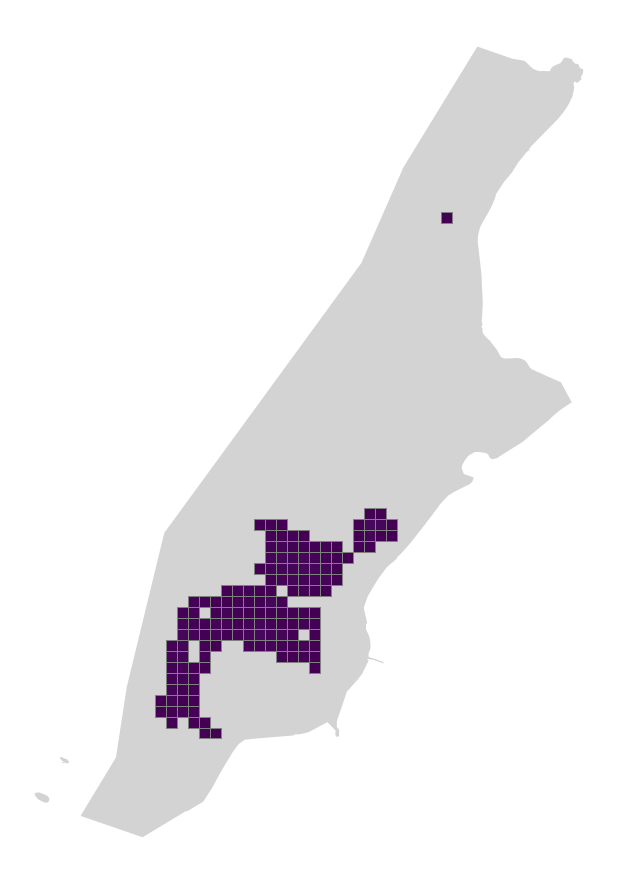

In [30]:
ax = ny.plot(color='lightgrey',figsize=(16,16))
cell.plot(ax=ax, column='n_fires', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(cell.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [31]:
r_tree = cell.sindex
print(r_tree)

rtree.index.Index(bounds=[-74.05001581096471, 40.679653701082806, -73.90676915686386, 40.887501787425215], size=70)


In [32]:
classes_and_coordinates = []
for leaf in r_tree.leaves():
    idxs, indices, bbox = leaf
    classes_and_coordinates.append([idxs,indices])
    print(f'-> points in box {idxs}: ',  indices, '\n bounding box: ', bbox, '\n')
print(f"number of leaves: {len(r_tree.leaves())}")

-> points in box 7:  [202, 276, 128, 54, 350, 498, 424, 425, 203, 351, 499, 277, 55, 129, 426, 204, 500, 352, 130, 278, 56, 427, 353, 205, 279, 501, 57, 131, 280, 58, 428, 132, 354, 206, 502, 133, 59, 503, 355, 429, 207, 281, 60, 282, 356, 208, 504, 134, 430, 61, 135, 505, 431, 209, 357, 283, 284, 432, 136, 210, 62, 358, 506, 137, 433, 63, 211, 285, 359, 507] 
 bounding box:  [-74.05001581096471, 40.831326628954294, -74.03035450549989, 40.859414208189754] 

-> points in box 6:  [414, 266, 44, 118, 340, 488, 192, 341, 415, 267, 45, 119, 489, 193, 342, 416, 268, 120, 46, 194, 490, 417, 491, 343, 269, 121, 47, 195, 418, 48, 344, 122, 196, 492, 270, 123, 419, 271, 345, 49, 493, 197, 198, 420, 50, 494, 124, 272, 346, 51, 495, 199, 273, 125, 347, 421, 200, 348, 496, 52, 126, 274, 422, 349, 127, 53, 497, 275, 423, 201] 
 bounding box:  [-74.05001581096471, 40.80323904971883, -74.03035450549989, 40.831326628954294] 

-> points in box 8:  [212, 360, 286, 64, 434, 508, 138, 361, 213, 65, 139, 50

In [33]:
boxes = []
boxes_idx = 0
for c in cell["geometry"]:
    boxes.append([boxes_idx,[]])
    for p in ny_coordinates_gpd.loc[:,'geometry']:
        if c.contains(p):
            boxes[boxes_idx][1].append(p)
    boxes_idx+=1

In [34]:
print("Grids with coordinates in them: ", len([b for b in boxes if bool(b[1])]))

Grids with coordinates in them:  147


In [35]:
labels_coordinates = [b for b in boxes if bool(b[1])]
[b for b in boxes if bool(b[1])][:3]

[[899,
 [900,
 [972,

In [36]:
labels_coordinates[0]

[899,

In [54]:
data = []
for i in range(len(labels_coordinates)):
    # print(labels_coordinates[i][1])
    for j in range(len(labels_coordinates[i][1])):
        data.append([np.array([labels_coordinates[i][1][j].y,labels_coordinates[i][1][j].x]), labels_coordinates[i][0]])

In [59]:
data[:40]

[[array([ 40.7133  , -74.013921]), 899],
 [array([ 40.71319 , -74.013953]), 899],
 [array([ 40.713105, -74.013975]), 899],
 [array([ 40.71302 , -74.013997]), 899],
 [array([ 40.712933, -74.014019]), 899],
 [array([ 40.712844, -74.014042]), 899],
 [array([ 40.712753, -74.014066]), 899],
 [array([ 40.712658, -74.01409 ]), 899],
 [array([ 40.712463, -74.01414 ]), 899],
 [array([ 40.712359, -74.014167]), 899],
 [array([ 40.712249, -74.014195]), 899],
 [array([ 40.71203 , -74.014252]), 899],
 [array([ 40.71192, -74.01428]), 899],
 [array([ 40.71181 , -74.014308]), 899],
 [array([ 40.711696, -74.014338]), 899],
 [array([ 40.711575, -74.014369]), 899],
 [array([ 40.714201, -74.013509]), 900],
 [array([ 40.714095, -74.013532]), 900],
 [array([ 40.714006, -74.01355 ]), 900],
 [array([ 40.7139  , -74.013607]), 900],
 [array([ 40.713817, -74.013664]), 900],
 [array([ 40.713719, -74.013732]), 900],
 [array([ 40.713687, -74.013753]), 900],
 [array([ 40.713604, -74.013802]), 900],
 [array([ 40.71349

In [60]:
import pickle

with open('grid_coordinates.pkl', 'wb') as f:
    pickle.dump(data, f)

In [61]:
len(cell)

3774